In [1]:
# A/B Testing + Customer Segmentation (K-Means)
# ==============================

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# --- Load dataset ---
df = pd.read_csv("C:\\Users\\ranji\\Documents\\DELL\\Data Analytics & Data Science\\32. 3rd Aug\\stats.csv")

In [3]:
# --- Step 1: Basic Summary ---
print("First few rows:\n", df.head(), "\n")
print("Missing values per column:\n", df.isnull().sum(), "\n")

First few rows:
    user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1 

Missing values per column:
 user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64 



In [4]:
# --- Step 2: A/B Testing (Control vs Treatment) ---
group_a = df[df['group'] == 'control']['converted']
group_b = df[df['group'] == 'treatment']['converted']

t_stat, p_val = stats.ttest_ind(group_a, group_b, equal_var=False)
print(f"T-Test Results:\nT-Statistic = {t_stat:.4f}, P-Value = {p_val:.4f}\n")

if p_val < 0.05:
    print(" Statistically significant difference between Control and Treatment groups.")
else:
    print(" No statistically significant difference between Control and Treatment groups.")

T-Test Results:
T-Statistic = 1.2369, P-Value = 0.2161

 No statistically significant difference between Control and Treatment groups.


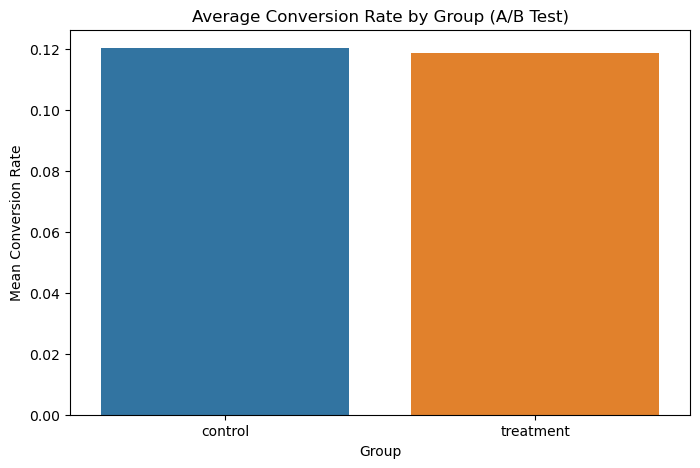

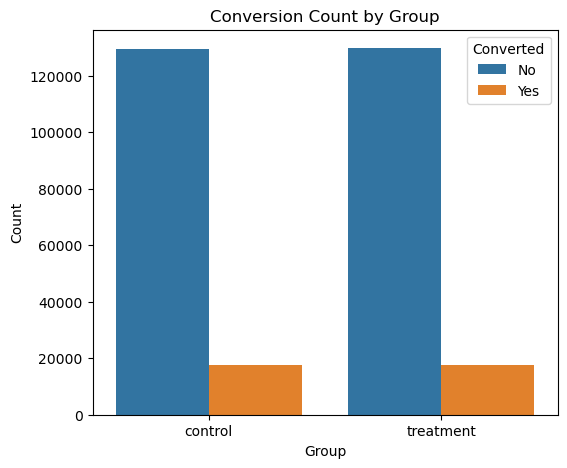

In [5]:
# --- Visualization of Conversion Rates ---
plt.figure(figsize=(8,5))
sns.barplot(x='group', y='converted', hue='group', data=df, estimator=np.mean, errorbar=None, legend=False)
plt.title("Average Conversion Rate by Group (A/B Test)")
plt.xlabel("Group")
plt.ylabel("Mean Conversion Rate")
plt.show()

plt.figure(figsize=(6,5))
sns.countplot(x='group', hue='converted', data=df)
plt.title("Conversion Count by Group")
plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title='Converted', labels=['No', 'Yes'])
plt.show()


In [6]:
# Step 3: Customer Segmentation (K-Means)
# ==============================

# --- Prepare numeric data ---
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
data_numeric = df[numeric_cols]


In [7]:
# --- Standardize the data ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

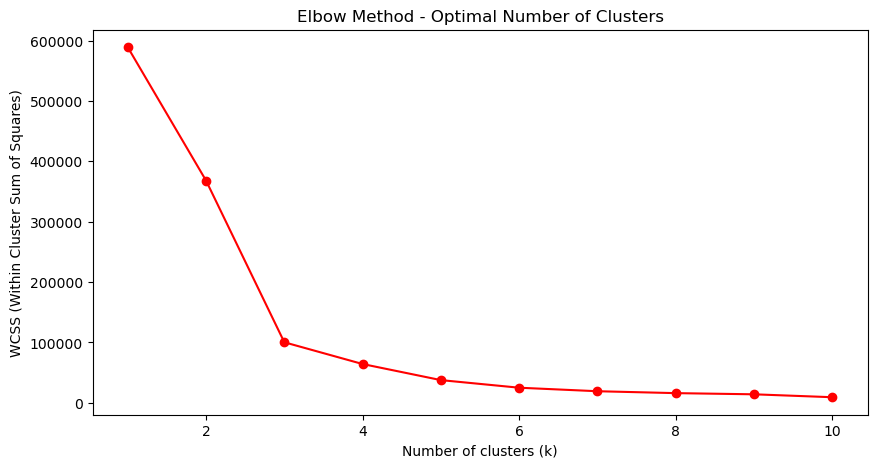

In [8]:
# --- Find the optimal number of clusters (Elbow Method) ---
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o', color='red')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()


In [9]:
# --- Apply KMeans with chosen number of clusters (k=3 or k=4) ---
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print("\nCluster assignments added to dataset:\n", df.head())



Cluster assignments added to dataset:
    user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   Cluster  
0        0  
1        3  
2        1  
3        0  
4        2  


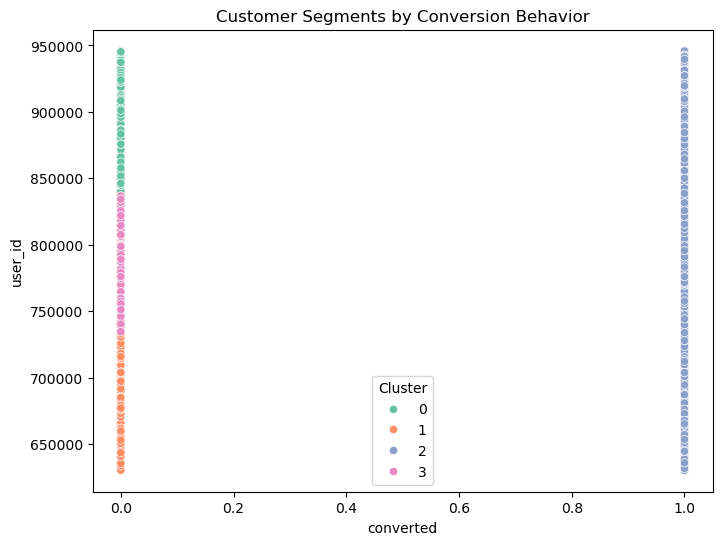

In [10]:
# --- Visualize Clusters (using two features for simplicity) ---
if 'converted' in df.columns and 'Cluster' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='converted', y='user_id', hue='Cluster', palette='Set2', data=df)
    plt.title('Customer Segments by Conversion Behavior')
    plt.show()

In [11]:
# --- Cluster Summary ---
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\nCluster Summary (Average Values per Segment):\n", cluster_summary)


Cluster Summary (Average Values per Segment):
                user_id  converted
Cluster                          
0        892560.206954        0.0
1        681927.872962        0.0
2        788394.376962        1.0
3        786526.436049        0.0
